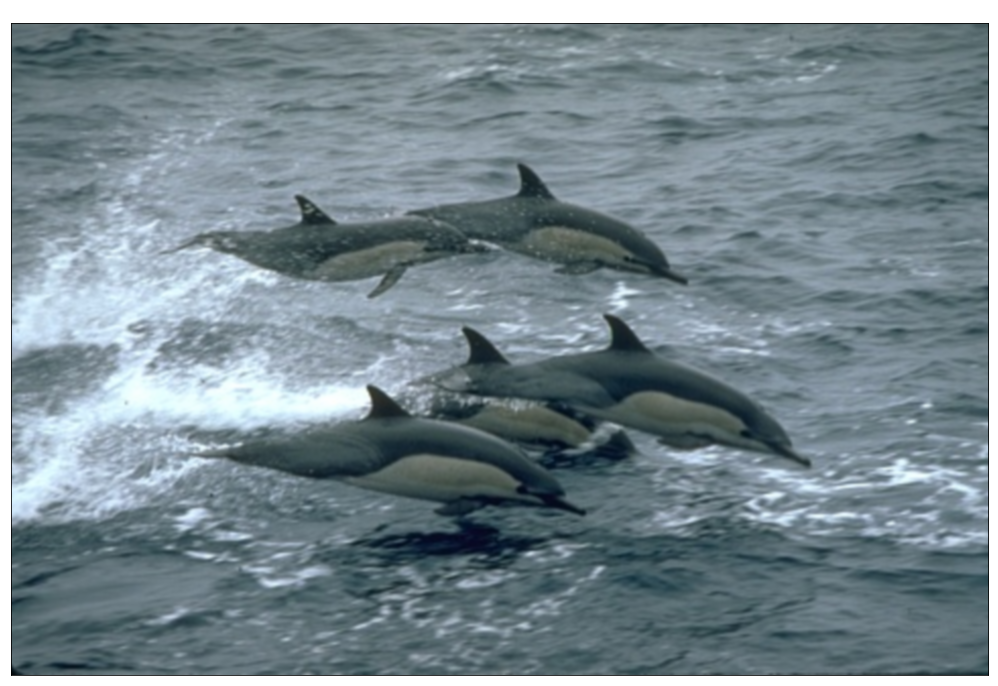

In [2]:
from __future__ import division
import cv2
import numpy as np
import matplotlib.pyplot as plt

def nothing(x):
    pass

# Importar imagen del dataset
ruta_img = 'E:/UTN/PES/TP/Datasets/BSDS/BSDS300/images/train/314016.jpg'
imagen = cv2.imread(ruta_img,1)
# Se transforma la imagen BRG a HSV
imagen = cv2.cvtColor(imagen, cv2.cv.CV_BGR2HSV)


fig = plt.figure(figsize=(18,12))
plt.title("Imagen: {}".format(ruta_img.split('/')[-1]),color="white")
plt.xticks([]),plt.yticks([])
# Se grafica la imagen con MATPLOTLIB
imagen_rgb = cv2.cvtColor(imagen, cv2.COLOR_HSV2RGB)
plt.imshow(imagen_rgb, interpolation = 'bicubic')

plt.show()

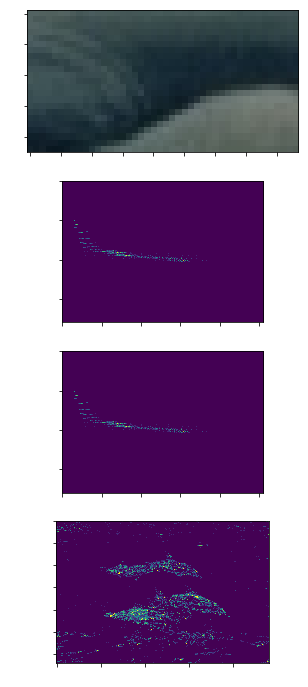

In [3]:
# Se prueba Histogram Back Projection

target = cv2.imread(ruta_img)
hsvt = cv2.cvtColor(target,cv2.COLOR_BGR2HSV)
#roi = target[175:250, 85:290] #y, x
roi = target[200:223,164:208]
hsv = cv2.cvtColor(roi,cv2.COLOR_BGR2HSV)

fig = plt.figure(figsize=(18,12))
plt.title("histograma",color="white")
plt.subplots_adjust(wspace=0.05)
roi_rgb = cv2.cvtColor(roi, cv2.cv.CV_BGR2RGB)
plt.subplot(4,1,1),plt.imshow(roi_rgb)
plt.xticks(color="white"),plt.yticks(color="white")

# calculating object histogram
roihist = cv2.calcHist([hsv],[0, 1], None, [180, 256], [0, 180, 0, 256] )
plt.subplot(4,1,2),plt.imshow(roihist)
plt.xticks(color="white"),plt.yticks(color="white")

# normalize histogram and apply backprojection
cv2.normalize(roihist,roihist,0,255,cv2.NORM_MINMAX)

plt.subplot(4,1,3),plt.imshow(roihist)
plt.xticks(color="white"),plt.yticks(color="white")

dst = cv2.calcBackProject([hsvt],[0,1],roihist,[0,180,0,256],1)

plt.subplot(4,1,4),plt.imshow(dst)
plt.xticks(color="white"),plt.yticks(color="white")
plt.show()


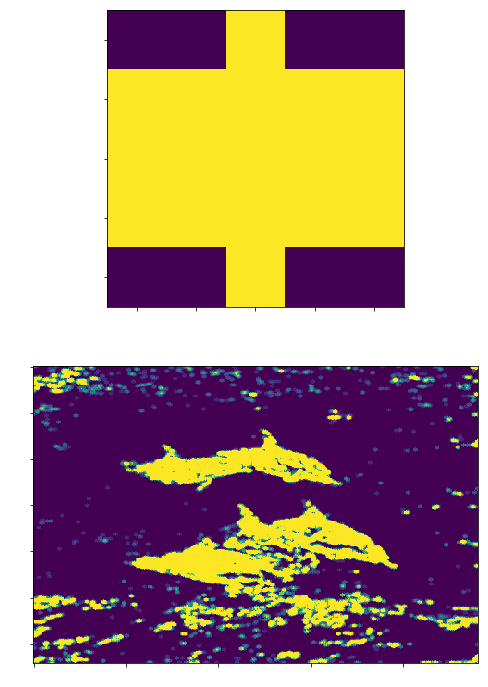

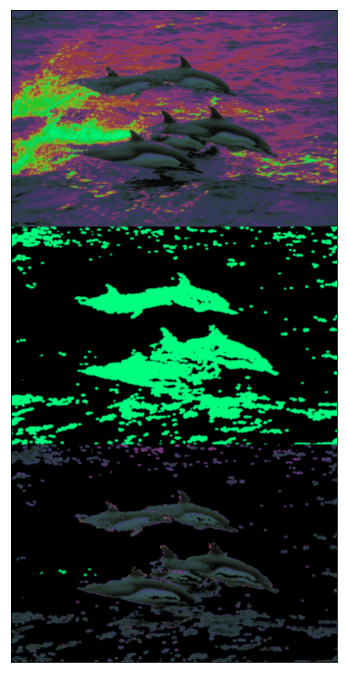

In [4]:
# Now convolute with circular disc
disc = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
cv2.filter2D(dst,-1,disc,dst)

fig = plt.figure(figsize=(18,12))
plt.subplots_adjust(wspace=0.05)
plt.subplot(2,1,1),plt.imshow(disc)
plt.xticks(color="white"),plt.yticks(color="white")

plt.subplot(2,1,2),plt.imshow(dst)
plt.xticks(color="white"),plt.yticks(color="white")

# threshold and binary AND
ret,thresh = cv2.threshold(dst,50,255,0)
thresh = cv2.merge((thresh,thresh,thresh))
res = cv2.bitwise_and(target,thresh)
res = np.vstack((target,thresh,res))

# Se grafica la imagen con MATPLOTLIB

res_rgb = cv2.cvtColor(res, cv2.COLOR_HSV2RGB)

fig = plt.figure(figsize=(18,12))
plt.xticks([]),plt.yticks([])
plt.imshow(res_rgb, interpolation = 'bicubic')

plt.show()


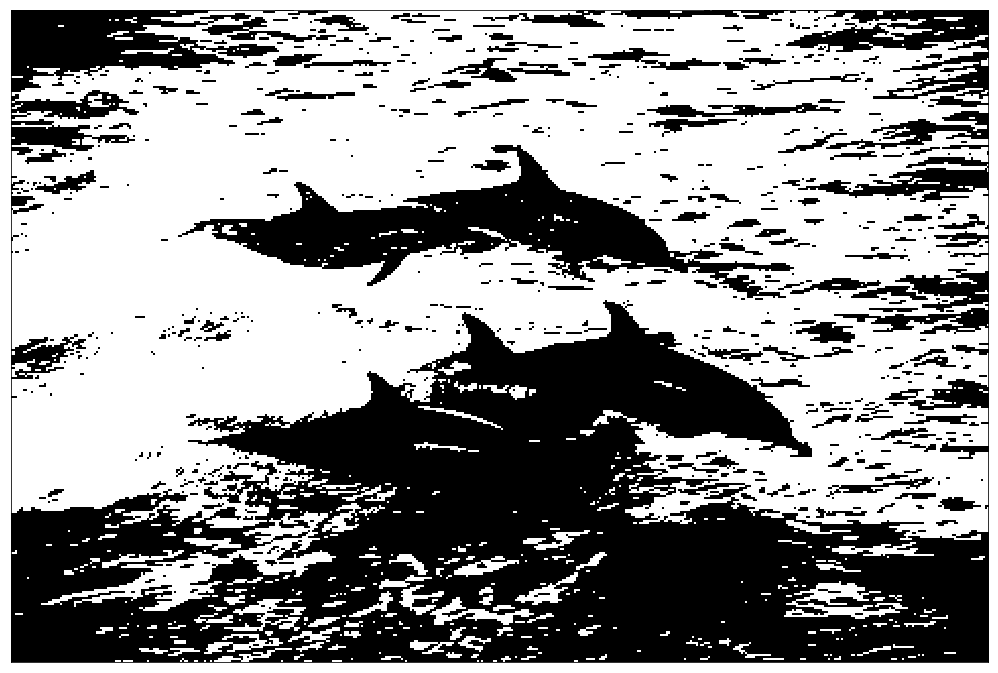

In [5]:
# Se probará un umbral determinado
imagen = cv2.imread(ruta_img)
imagen_gray = cv2.cvtColor(imagen,cv2.COLOR_BGR2GRAY)

umbral = 117

ret, thresh = cv2.threshold(imagen_gray,umbral,255,0)

thresh = cv2.cvtColor(thresh,cv2.COLOR_GRAY2RGB)
fig = plt.figure(figsize=(18,12))
plt.xticks([]),plt.yticks([])
plt.imshow(thresh)
plt.show()


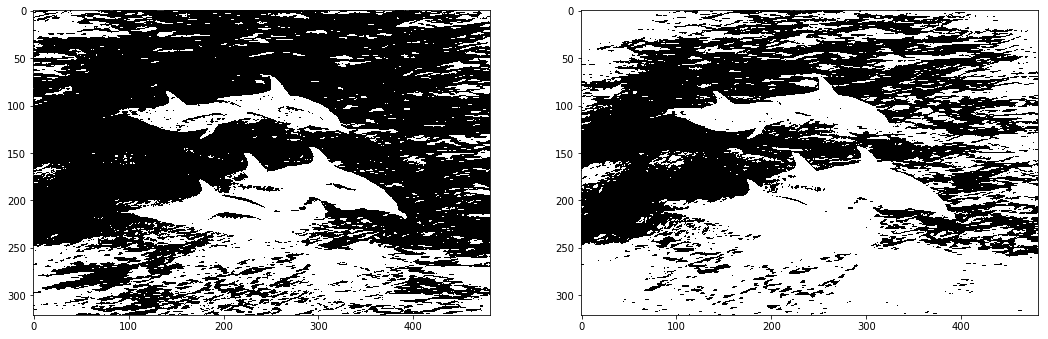

In [6]:
# otro umbral comparando con Thresh otsu
umbral = 108

ret, thresh = cv2.threshold(imagen_gray,umbral,255,cv2.THRESH_BINARY_INV)
ret2, thresh2 = cv2.threshold(imagen_gray,umbral,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

thresh = cv2.cvtColor(thresh,cv2.COLOR_GRAY2RGB)
thresh2 = cv2.cvtColor(thresh2,cv2.COLOR_GRAY2RGB)
fig = plt.figure(figsize=(18,12))
plt.xticks([]),plt.yticks([])
plt.subplot(1,2,1),plt.imshow(thresh)
plt.subplot(1,2,2),plt.imshow(thresh2)
plt.show()




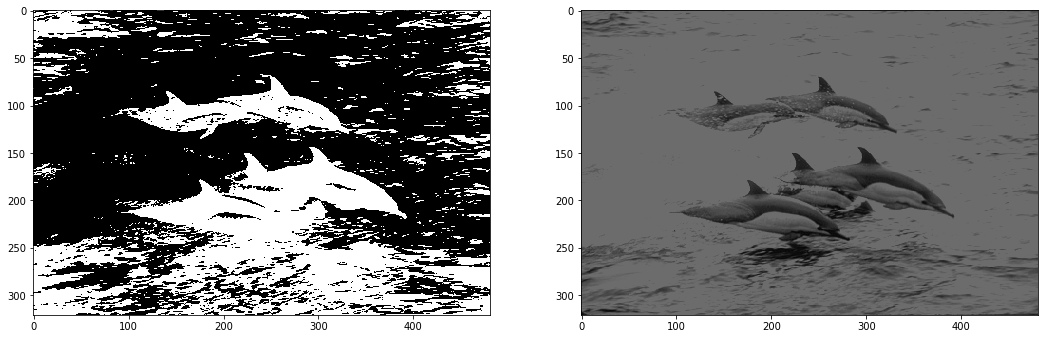

In [7]:
# se probaran diferentes opciones de threshold

imagen = cv2.imread(ruta_img)
imagen_gray = cv2.cvtColor(imagen,cv2.COLOR_BGR2GRAY)

umbral = 108

ret, thresh = cv2.threshold(imagen_gray,umbral,255,cv2.THRESH_BINARY_INV)
ret2, thresh2 = cv2.threshold(imagen_gray,umbral,255,cv2.THRESH_TRUNC)

thresh = cv2.cvtColor(thresh,cv2.COLOR_GRAY2RGB)
thresh2 = cv2.cvtColor(thresh2,cv2.COLOR_GRAY2RGB)
fig = plt.figure(figsize=(18,12))
plt.xticks([]),plt.yticks([])
plt.subplot(1,2,1),plt.imshow(thresh)
plt.subplot(1,2,2),plt.imshow(thresh2)
plt.show()

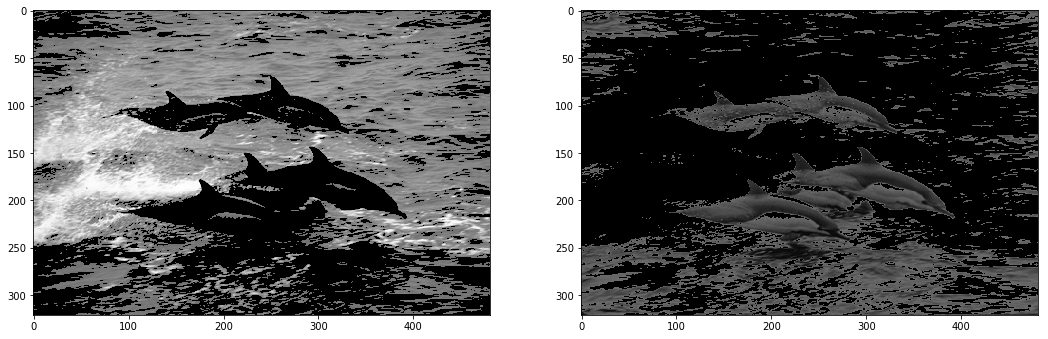

In [8]:
# se probaran diferentes opciones de threshold

imagen = cv2.imread(ruta_img)
imagen_gray = cv2.cvtColor(imagen,cv2.COLOR_BGR2GRAY)

umbral = 108

ret, thresh = cv2.threshold(imagen_gray,umbral,255,cv2.THRESH_TOZERO)
ret2, thresh2 = cv2.threshold(imagen_gray,umbral,255,cv2.THRESH_TOZERO_INV)

thresh = cv2.cvtColor(thresh,cv2.COLOR_GRAY2RGB)
thresh2 = cv2.cvtColor(thresh2,cv2.COLOR_GRAY2RGB)
fig = plt.figure(figsize=(18,12))
plt.xticks([]),plt.yticks([])
plt.subplot(1,2,1),plt.imshow(thresh)
plt.subplot(1,2,2),plt.imshow(thresh2)
plt.show()

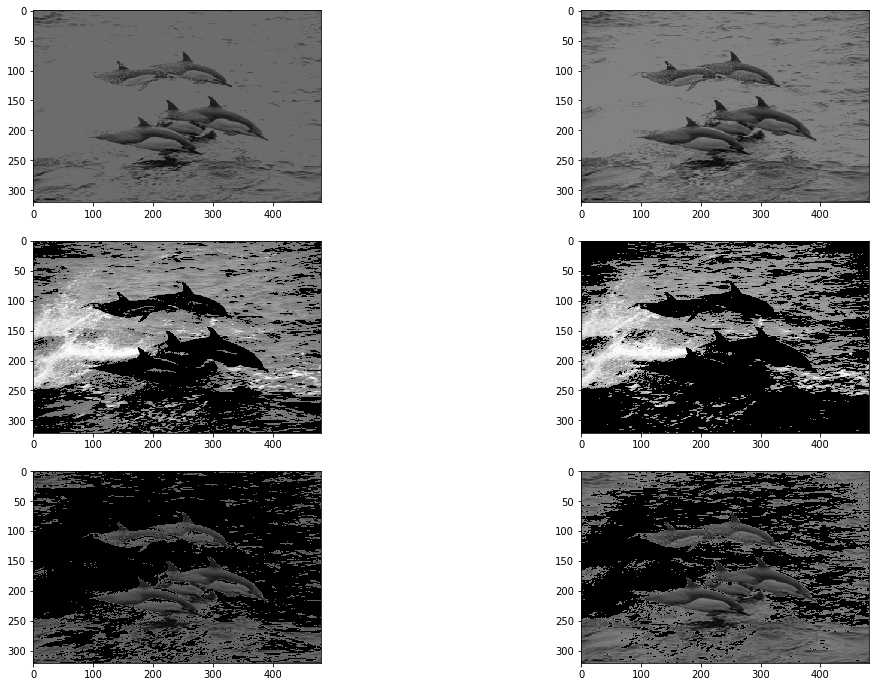

In [9]:
# se probaran diferentes opciones de threshold comparando con OTSU

imagen = cv2.imread(ruta_img)
imagen_gray = cv2.cvtColor(imagen,cv2.COLOR_BGR2GRAY)

umbral = 108

ret, thresh = cv2.threshold(imagen_gray,umbral,255,cv2.THRESH_TRUNC)
ret2, thresh2 = cv2.threshold(imagen_gray,umbral,255,cv2.THRESH_TRUNC+cv2.THRESH_OTSU)
ret3, thresh3 = cv2.threshold(imagen_gray,umbral,255,cv2.THRESH_TOZERO)
ret4, thresh4 = cv2.threshold(imagen_gray,umbral,255,cv2.THRESH_TOZERO+cv2.THRESH_OTSU)
ret5, thresh5 = cv2.threshold(imagen_gray,umbral,255,cv2.THRESH_TOZERO_INV)
ret6, thresh6 = cv2.threshold(imagen_gray,umbral,255,cv2.THRESH_TOZERO_INV+cv2.THRESH_OTSU)

thresh = cv2.cvtColor(thresh,cv2.COLOR_GRAY2RGB)
thresh2 = cv2.cvtColor(thresh2,cv2.COLOR_GRAY2RGB)
thresh3 = cv2.cvtColor(thresh3,cv2.COLOR_GRAY2RGB)
thresh4 = cv2.cvtColor(thresh4,cv2.COLOR_GRAY2RGB)
thresh5 = cv2.cvtColor(thresh5,cv2.COLOR_GRAY2RGB)
thresh6 = cv2.cvtColor(thresh6,cv2.COLOR_GRAY2RGB)
fig = plt.figure(figsize=(18,12))
plt.xticks([]),plt.yticks([])
plt.subplot(3,2,1),plt.imshow(thresh)
plt.subplot(3,2,2),plt.imshow(thresh2)
plt.subplot(3,2,3),plt.imshow(thresh3)
plt.subplot(3,2,4),plt.imshow(thresh4)
plt.subplot(3,2,5),plt.imshow(thresh5)
plt.subplot(3,2,6),plt.imshow(thresh6)
plt.show()

#conclusion: para ese nivel de umbral el tozero_inv sin otsu fue el mejor

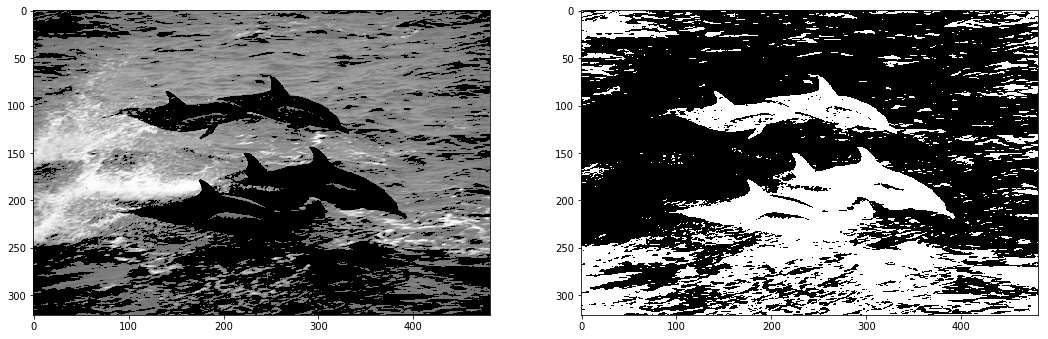

In [3]:

imagen = cv2.imread(ruta_img)
imagen_gray = cv2.cvtColor(imagen,cv2.COLOR_BGR2GRAY)

umbral = 108

ret, thresh = cv2.threshold(imagen_gray,umbral,255,cv2.THRESH_TOZERO)

# se da vuelta la mascara para que sea blanco el objeto detectado y negro el fondo
thresh2 = np.empty((len(thresh), len(thresh[0]), 1), np.uint8)
for a in range(len(thresh)):
    for b in range(len(thresh[a])):
        if (thresh[a][b] == 0):
            thresh2[a][b] = 255
        else:
            thresh2[a][b] = 0

thresh = cv2.cvtColor(thresh,cv2.COLOR_GRAY2RGB)
thresh2 = cv2.cvtColor(thresh2,cv2.COLOR_GRAY2RGB)
fig = plt.figure(figsize=(18,12))
plt.xticks([]),plt.yticks([])
plt.subplot(1,2,1),plt.imshow(thresh)
plt.subplot(1,2,2),plt.imshow(thresh2)
plt.show()

#print(thresh5[170][200])



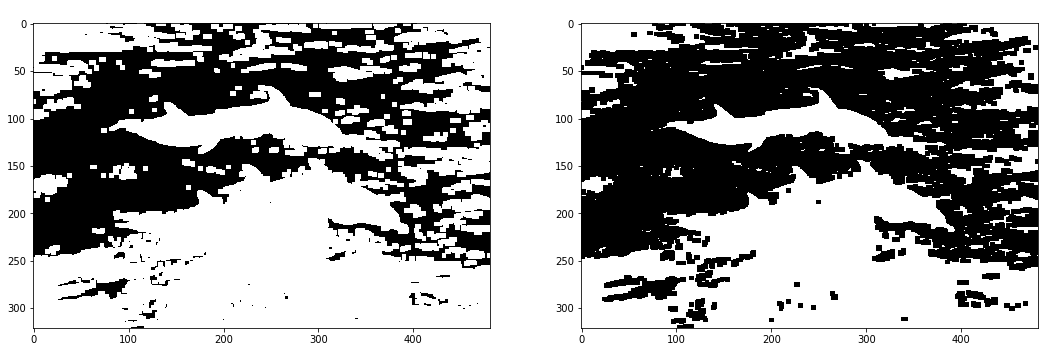

In [41]:
# se vuelve a un threshold binario para poder aplicar dilate y erode

imagen = cv2.imread(ruta_img)
imagen_gray = cv2.cvtColor(imagen,cv2.COLOR_BGR2GRAY)

umbral = 108

ret, mask = cv2.threshold(imagen_gray,umbral,255,cv2.THRESH_BINARY_INV)

# se aplican transformaciones morfologicas erode y dilate
kernel = np.ones((5,5),np.uint8)

# dilate y erode
maskd_dilate = cv2.dilate(mask,kernel,iterations = 1)
maskd_erode = cv2.erode(maskd_dilate,kernel,iterations = 1) 
maskd = maskd_erode # se almacena la ultima mascara calculada

# se grafica cada paso
maskd_dilate_rgb = cv2.cvtColor(maskd_dilate,cv2.COLOR_GRAY2RGB)
maskd_erode_rgb = cv2.cvtColor(maskd_erode,cv2.COLOR_GRAY2RGB)
fig = plt.figure(figsize=(18,12))

plt.xticks([]),plt.yticks([])
plt.subplot(1,2,1),plt.imshow(maskd_dilate_rgb)
plt.title("Dilate",color="white")
plt.subplot(1,2,2),plt.imshow(maskd_erode_rgb)
plt.title("Erode",color="white")
plt.show()



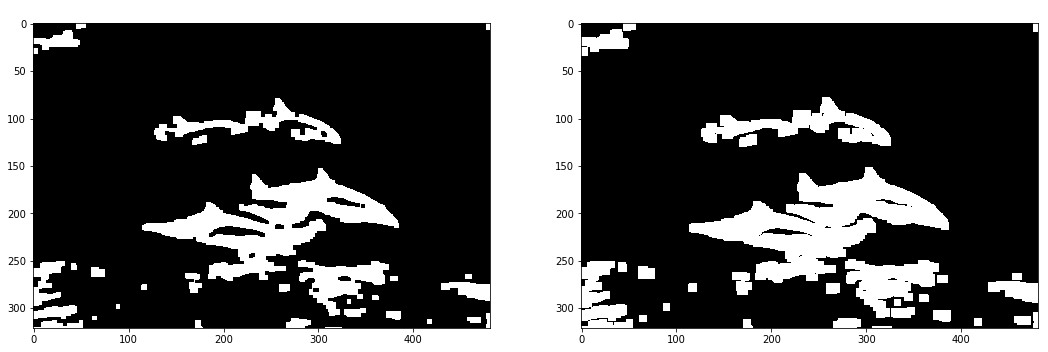

In [53]:
# se realiza el proceso inverso
# es decir: erode y luego dilate
# se vuelve a un threshold binario para poder aplicar dilate y erode

imagen = cv2.imread(ruta_img)
imagen_gray = cv2.cvtColor(imagen,cv2.COLOR_BGR2GRAY)

umbral = 108

ret, mask = cv2.threshold(imagen_gray,umbral,255,cv2.THRESH_BINARY_INV)

# se aplican transformaciones morfologicas erode y dilate
kernel = np.ones((8,8),np.uint8)

# erode y dilate
maskd_erode = cv2.erode(mask,kernel,iterations = 1) 
maskd_dilate = cv2.dilate(maskd_erode,kernel,iterations = 1)
maskd = maskd_dilate # se almacena la ultima mascara calculada

# erode y dilate #2
kernel = np.ones((6,6),np.uint8)
maskd_erode = cv2.erode(maskd,kernel,iterations = 1) 
maskd_dilate = cv2.dilate(maskd_erode,kernel,iterations = 1)
maskd = maskd_dilate # se almacena la ultima mascara calculada

# erode y dilate #3
kernel = np.ones((4,4),np.uint8)
maskd_erode = cv2.erode(maskd,kernel,iterations = 1) 
maskd_dilate = cv2.dilate(maskd_erode,kernel,iterations = 1)
maskd = maskd_dilate # se almacena la ultima mascara calculada

# se grafica cada paso
maskd_dilate_rgb = cv2.cvtColor(maskd_dilate,cv2.COLOR_GRAY2RGB)
maskd_erode_rgb = cv2.cvtColor(maskd_erode,cv2.COLOR_GRAY2RGB)
fig = plt.figure(figsize=(18,12))

plt.xticks([]),plt.yticks([])
plt.subplot(1,2,1),plt.imshow(maskd_erode_rgb)
plt.title("Erode",color="white")

plt.subplot(1,2,2),plt.imshow(maskd_dilate_rgb)
plt.title("Dilate",color="white")
plt.show()



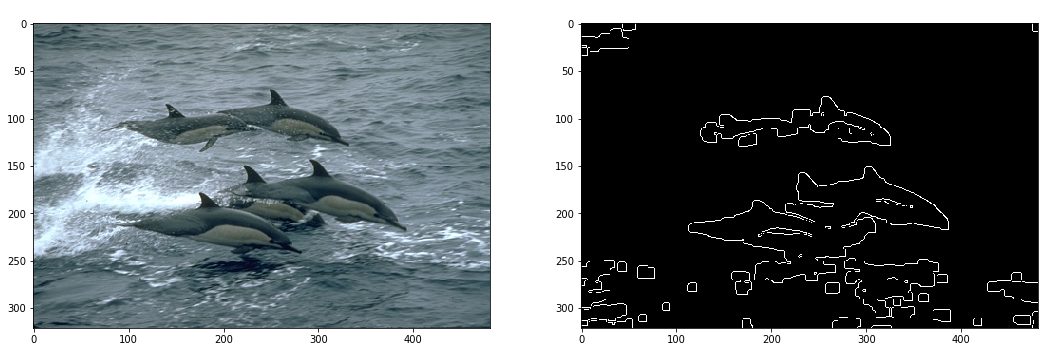

In [57]:
# se aplica CANNY
bordes = cv2.Canny(maskd,30,100)

imagen_rgb = cv2.cvtColor(imagen,cv2.COLOR_BGR2RGB)
bordes_rgb = cv2.cvtColor(bordes,cv2.COLOR_GRAY2RGB)

fig = plt.figure(figsize=(18,12))
plt.xticks([]),plt.yticks([])
plt.subplot(1,2,1),plt.imshow(imagen_rgb)
plt.title("Imagen",color="white")
plt.subplot(1,2,2),plt.imshow(bordes_rgb)
plt.title("Canny",color="white")
plt.show()

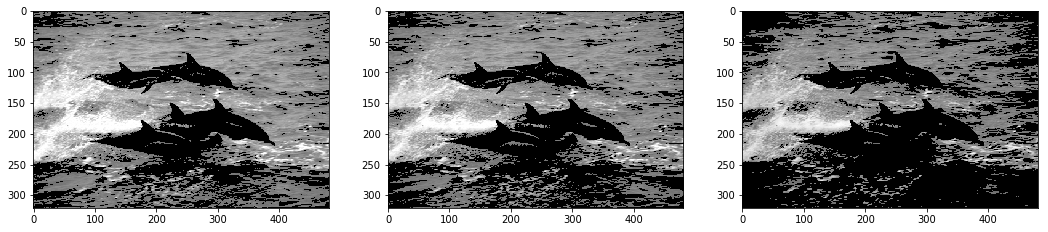

'contours, hierarchy = cv2.findContours(\n    thresh,                  # imagen a contornear\n    cv2.RETR_TREE,           # contour retrieval mode\n    cv2.CHAIN_APPROX_SIMPLE  # contour approximation method\n)  \n# para graficar todos los contornos de la imagen\ncv2.drawContours(imagen, contours, -1, (180,100,0), 3)'

In [9]:
## Esto aporta a un nivel mas avanzado para analizar

## voy a dividir en los 3 canales

b,g,r = cv2.split(imagen)

umbral_b = 110
umbral_g = 110
umbral_r = 110

ret, thresh = cv2.threshold(b,umbral_b,255,cv2.THRESH_TOZERO)
ret2, thresh2 = cv2.threshold(g,umbral_g,255,cv2.THRESH_TOZERO)
ret3, thresh3 = cv2.threshold(r,umbral_r,255,cv2.THRESH_TOZERO)

thresh = cv2.cvtColor(thresh,cv2.COLOR_GRAY2RGB)
thresh2 = cv2.cvtColor(thresh2,cv2.COLOR_GRAY2RGB)
thresh3 = cv2.cvtColor(thresh3,cv2.COLOR_GRAY2RGB)
fig = plt.figure(figsize=(18,12))
plt.xticks([]),plt.yticks([])
plt.subplot(1,3,1),plt.imshow(thresh)
plt.subplot(1,3,2),plt.imshow(thresh2)
plt.subplot(1,3,3),plt.imshow(thresh3)
plt.show()

'''contours, hierarchy = cv2.findContours(
    thresh,                  # imagen a contornear
    cv2.RETR_TREE,           # contour retrieval mode
    cv2.CHAIN_APPROX_SIMPLE  # contour approximation method
)  
# para graficar todos los contornos de la imagen
cv2.drawContours(imagen, contours, -1, (180,100,0), 3)'''

e:\utn\pes\env_py2.7\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


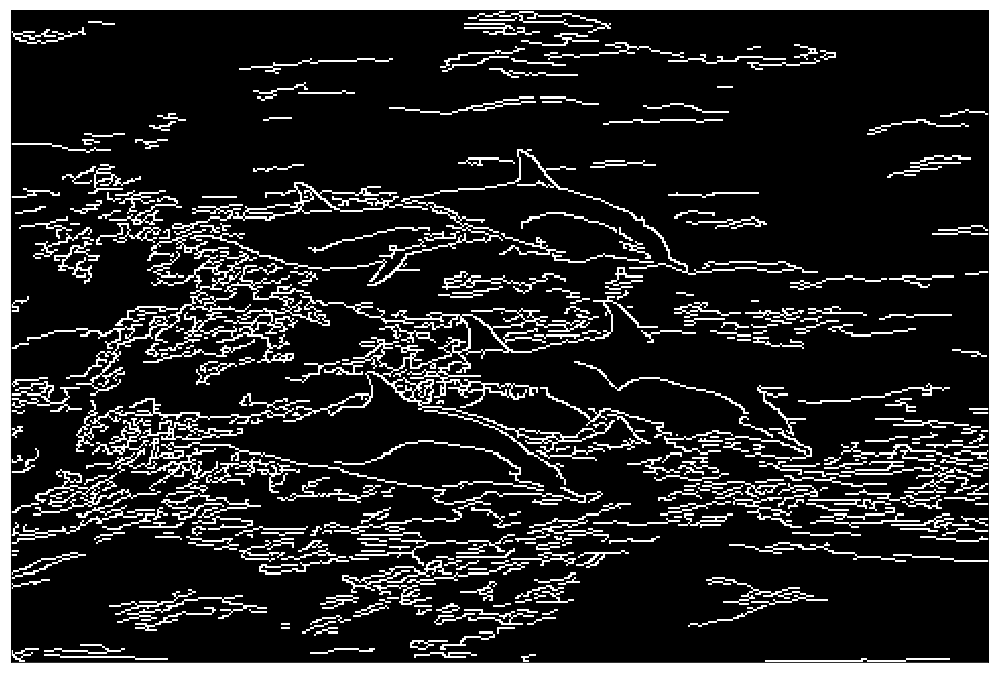

In [10]:

edges = cv2.Canny(imagen_gray,
                  65,
                  255,
                  apertureSize = 3, #depende del operador Sobel() -> podra ser 1,3,5 ó 7
                  L2gradient=True) #depende que tan preciso quiera el resultado. -> True Preciso
edges = cv2.cvtColor(edges,cv2.COLOR_GRAY2RGB)
fig = plt.figure(figsize=(18,12))
plt.xticks([]),plt.yticks([])
plt.subplot(1,1,1),plt.imshow(edges)
plt.show()


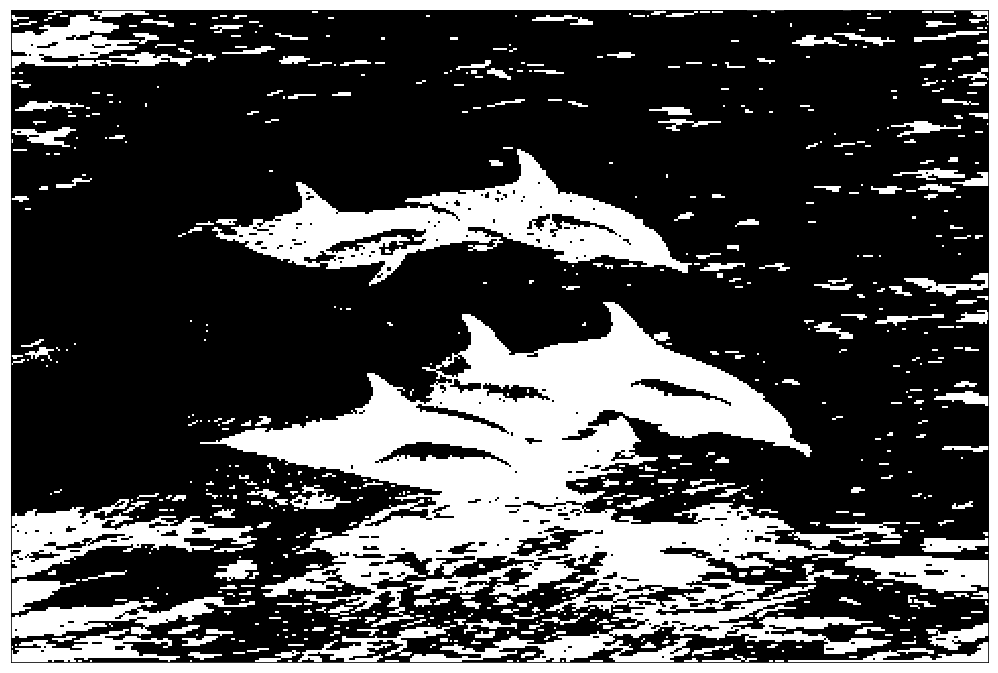

In [240]:
# Se probará el algoritmo watershed
# Lo utilizaré para una marker-based image segmentation

imagen = cv2.imread(ruta_img)
imagen_gray = cv2.cvtColor(imagen,cv2.COLOR_BGR2GRAY)

umbral = 100
ret, thresh = cv2.threshold(imagen_gray,umbral,255,cv2.THRESH_BINARY_INV)
thresh_rgb = cv2.cvtColor(thresh,cv2.COLOR_GRAY2RGB)
fig = plt.figure(figsize=(18,12))
plt.imshow(thresh_rgb)
plt.xticks([]),plt.yticks([])
plt.show()

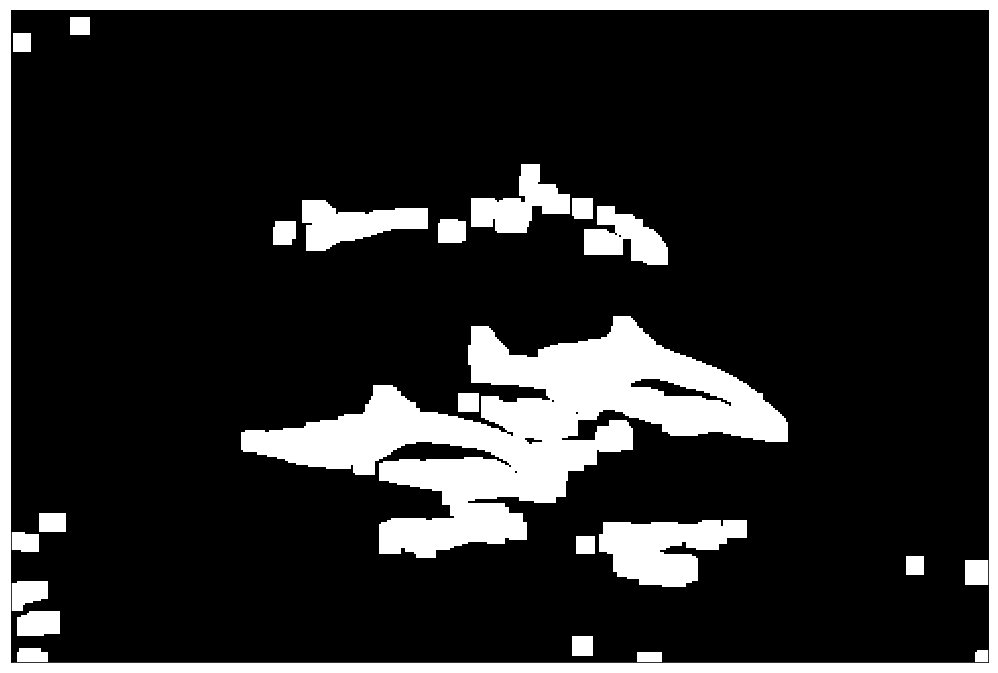

In [265]:
## remocion de ruido (apertura)
kernel = np.ones((3,3),np.uint8)
apertura = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations = 4)

apertura_rgb = cv2.cvtColor(apertura,cv2.COLOR_GRAY2RGB)
fig = plt.figure(figsize=(18,12))
plt.imshow(apertura_rgb)
plt.xticks([]),plt.yticks([])
plt.show()

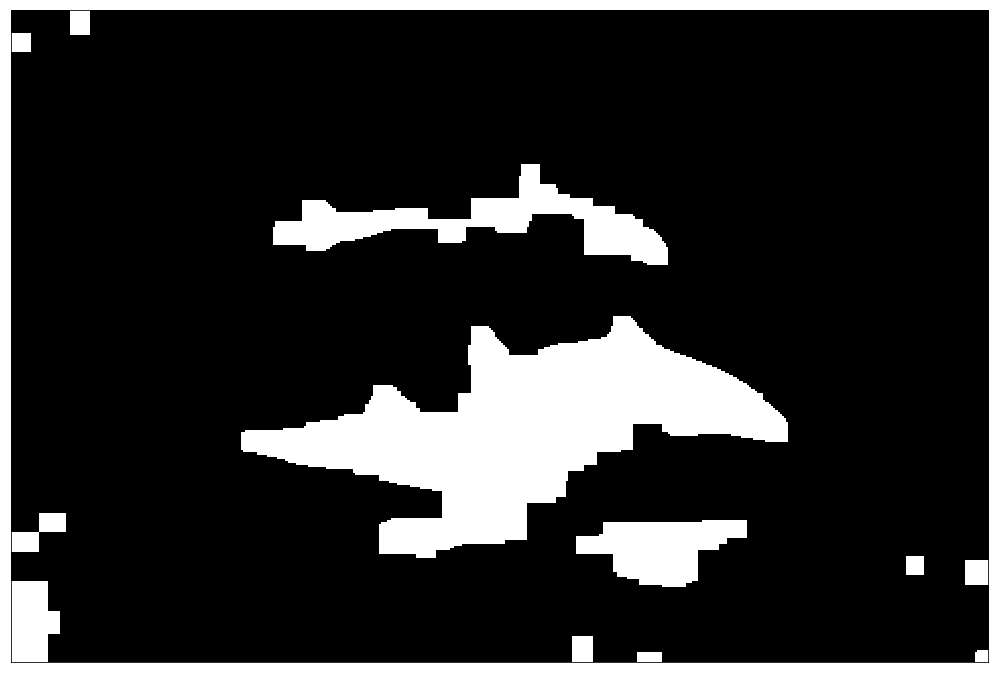

In [266]:
# remocion de ruido (cierre)
kernel = np.ones((3,3),np.uint8)
cierre = cv2.morphologyEx(apertura, cv2.MORPH_CLOSE, kernel, iterations = 5)

cierre_rgb = cv2.cvtColor(cierre,cv2.COLOR_GRAY2RGB)
fig = plt.figure(figsize=(18,12))
plt.imshow(cierre_rgb)
plt.xticks([]),plt.yticks([])
plt.show()

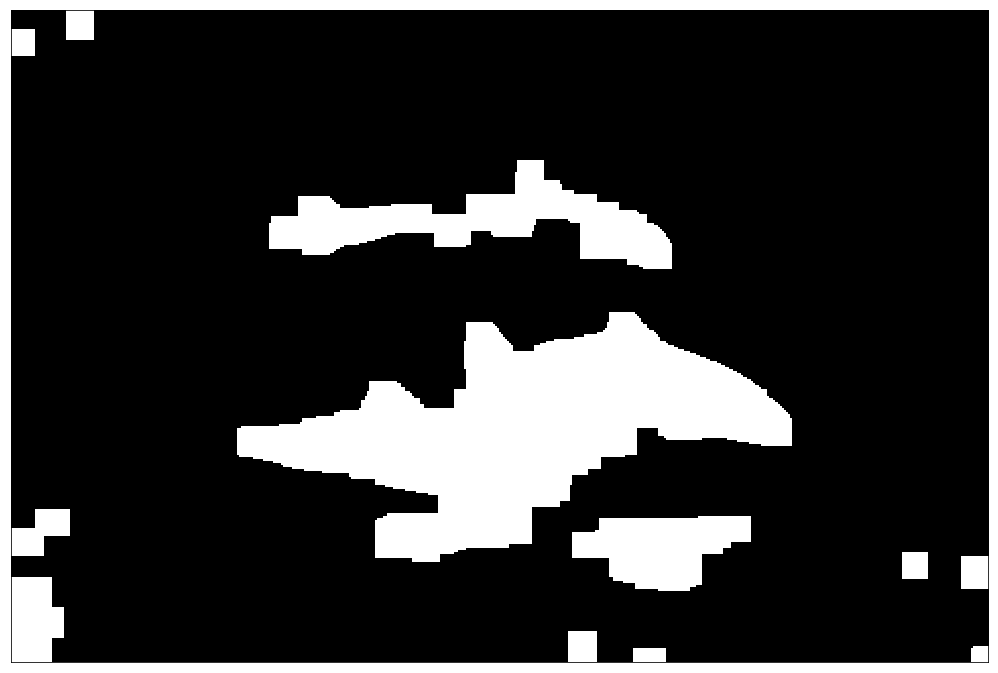

In [267]:
# area de background segura
bg_segura = cv2.dilate(cierre, kernel, iterations=2)

bg_segura_rgb = cv2.cvtColor(bg_segura,cv2.COLOR_GRAY2RGB)
fig = plt.figure(figsize=(18,12))
plt.imshow(bg_segura_rgb)
plt.xticks([]),plt.yticks([])
plt.show()

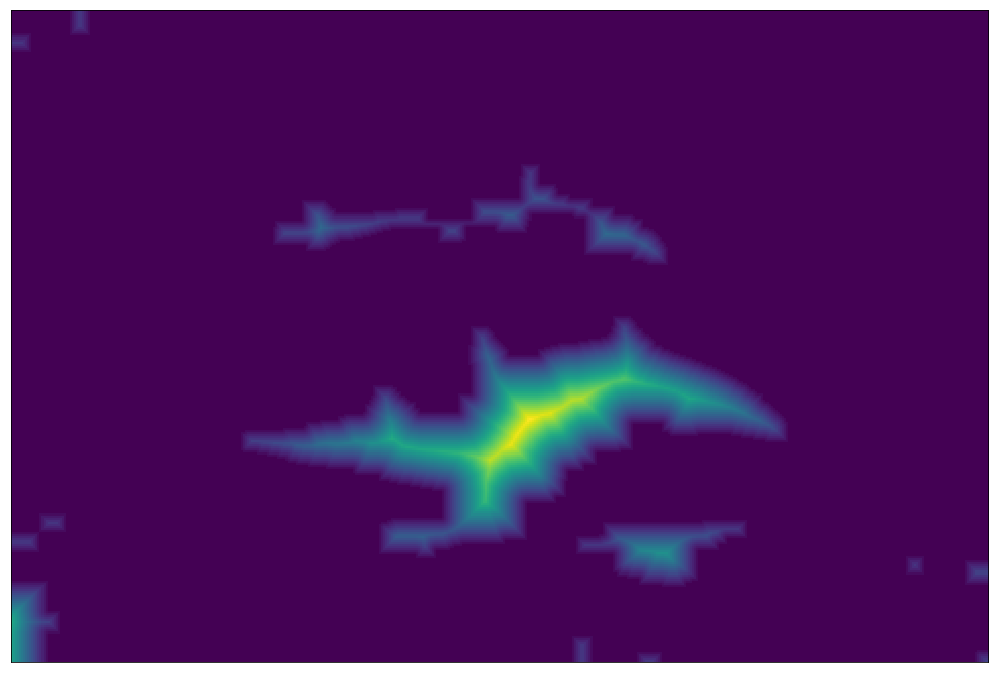

In [343]:
# Buscando area de foreground segura (dist_transform)
#dist_transform = cv2.distanceTransform(src=cierre, distanceType=cv2.cv.CV_DIST_L1, maskSize=3)
dist_transform = cv2.distanceTransform(src=cierre, distanceType=cv2.cv.CV_DIST_L2, maskSize=5)
#dist_transform = cv2.distanceTransform(src=cierre, distanceType=cv2.cv.CV_DIST_C, maskSize=5)
#dist_transform = cv2.distanceTransform(src=cierre, distanceType=cv2.cv.CV_DIST_L2, maskSize=cv2.cv.CV_DIST_MASK_PRECISE)

fig = plt.figure(figsize=(18,12))
plt.imshow(dist_transform)
plt.xticks([]),plt.yticks([])
plt.show()


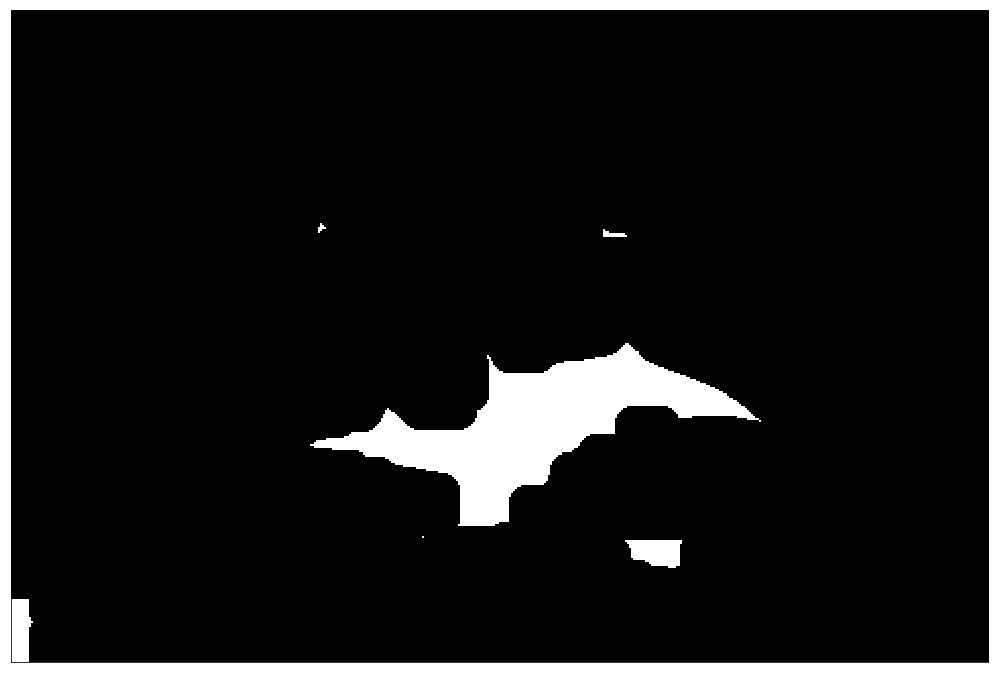

In [363]:
# Buscando area de foreground segura (threshold)
ret, fg_segura = cv2.threshold(dist_transform,0.3*dist_transform.max(),255,0)


fg_segura_rgb = cv2.cvtColor(fg_segura,cv2.COLOR_GRAY2RGB)
fig = plt.figure(figsize=(18,12))
plt.imshow(fg_segura_rgb)
plt.xticks([]),plt.yticks([])
plt.show()



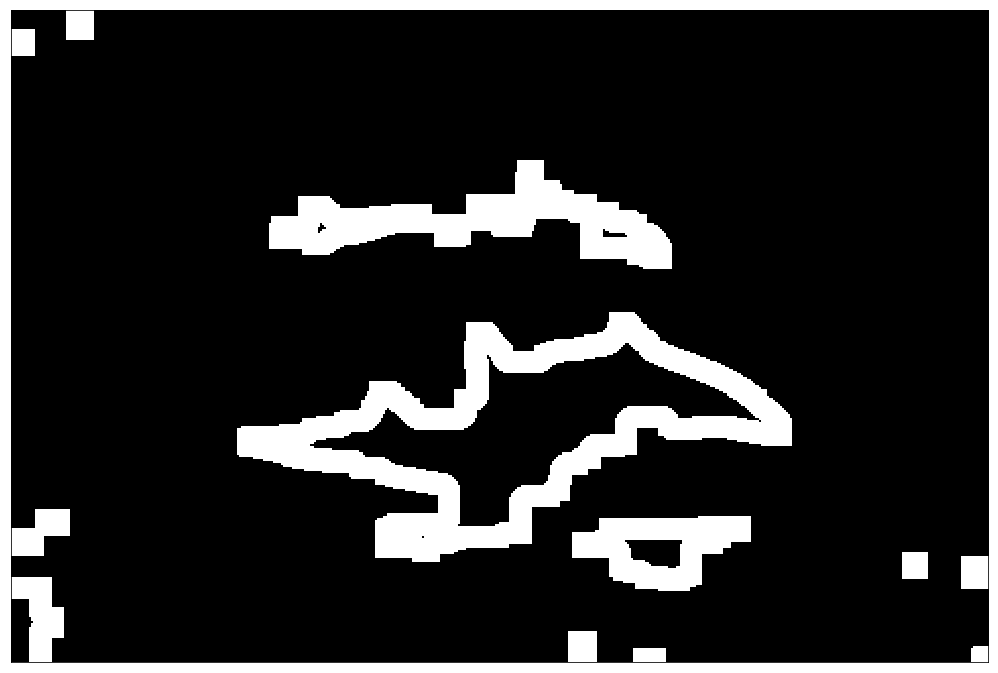

In [364]:
# Buscando la region desconocida
fg_segura_uint8 = np.uint8(fg_segura)
desconocida = cv2.subtract(bg_segura,fg_segura_uint8)

desconocida_rgb = cv2.cvtColor(desconocida,cv2.COLOR_GRAY2RGB)
fig = plt.figure(figsize=(18,12))
plt.imshow(desconocida_rgb)
plt.xticks([]),plt.yticks([])
plt.show()

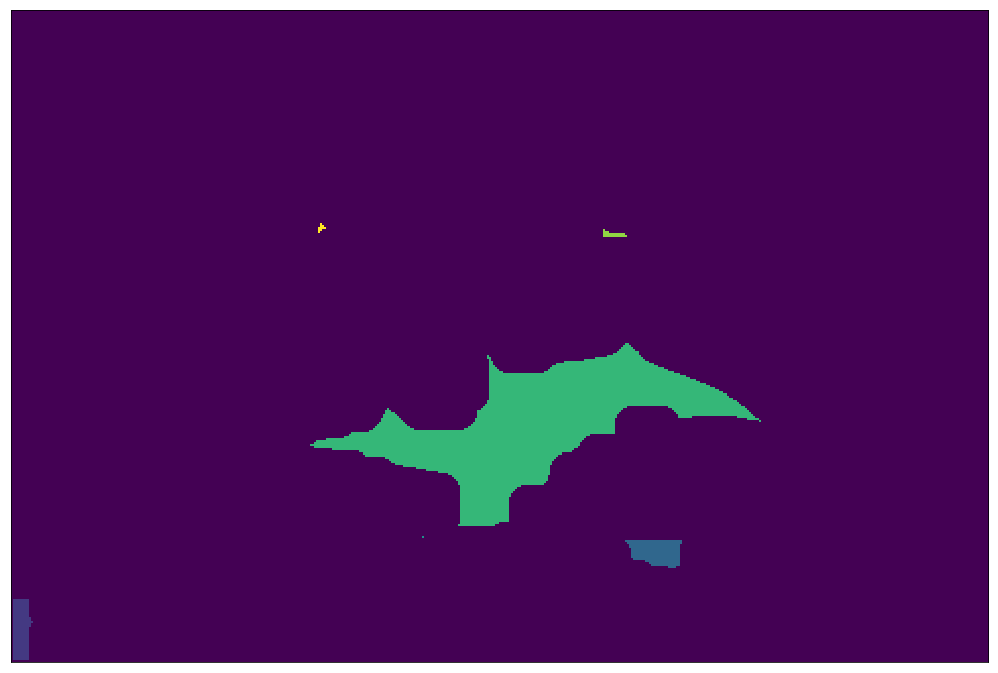

In [365]:
# Etiquetado de los marcadores
markers = np.zeros(dist_transform.shape, dtype=np.int32)

fg_segura_uint8 = np.uint8(fg_segura)
contours, hierarchy = cv2.findContours(fg_segura_uint8, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

for i in range(len(contours)):
    cv2.drawContours(markers, contours, i, (i+1), -1)

    
#markers_rgb = cv2.cvtColor(markers,cv2.COLOR_RGB2BGR)
fig = plt.figure(figsize=(18,12))
plt.imshow(markers)
plt.xticks([]),plt.yticks([])
plt.show()



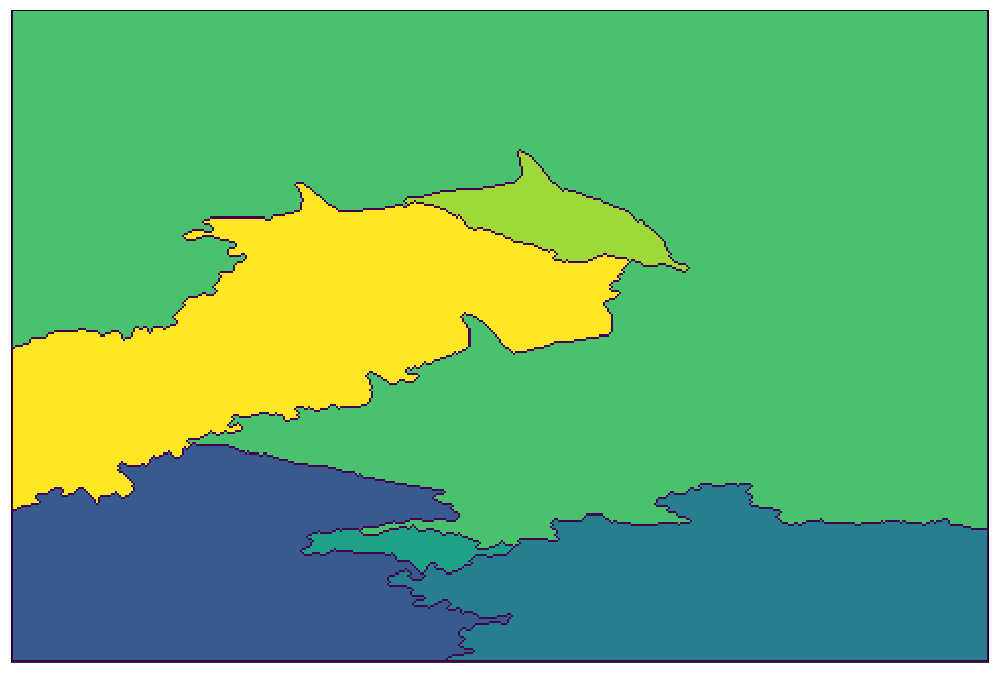

In [366]:
# Se aplica metodo Watershed

#markers = cv2.circle(markers, (15,15), 5, len(contours)+1, -1)
markers_2 = cv2.watershed(imagen, markers)
imagen[markers_2 == -1] = [0,0,255]

fig = plt.figure(figsize=(18,12))
plt.imshow(markers)
plt.xticks([]),plt.yticks([])
plt.show()
